In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from os.path import join as join_path
from os import listdir
import matplotlib.pyplot as plt
from skimage.exposure import histogram
import seaborn as sns
import numpy as np
from sklearn.model_selection import GroupKFold
%matplotlib inline

In [32]:
data_dir = '../data/'
train_images_dir = join_path(data_dir, 'train/')
test_images_dir = join_path(data_dir, 'test/')
train_labels = pd.read_csv(join_path(data_dir, 'training_set_labels.csv'))
train_features = pd.read_csv(join_path(data_dir, 'training_set_features.csv'))
test_features = pd.read_csv(join_path(data_dir, 'test_set_features.csv'))
train_images = [join_path(train_images_dir, x) for x in listdir(train_images_dir)]
test_images = [join_path(test_images_dir, x) for x in listdir(test_images_dir)]
merged_train = pd.merge(train_labels, train_features)
merged_train = merged_train.sort_values('wind_speed', ascending=False)

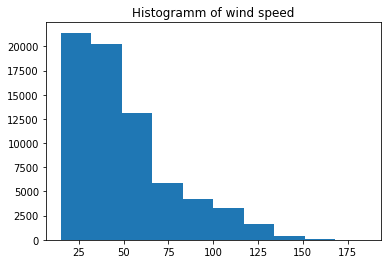

In [54]:
plt.hist(merged_train['wind_speed']);
plt.title('Histogramm of wind speed');

In [70]:
train_grouped  = merged_train.groupby(['storm_id'])
train_grouped['wind_speed'].agg([np.max, np.mean, np.std, np.min]).sort_values('amax')

,amax,mean,std,amin
storm_id,,,,
yso,15,15.000000,0.000000,15
nkm,21,18.250000,1.864745,16
wgl,25,25.000000,0.000000,25
hnb,25,25.000000,0.000000,25
dvp,25,25.000000,0.000000,25
...,...,...,...,...
tmv,155,88.118280,39.016795,25
xgr,155,90.935065,41.154209,30
rdc,155,100.265766,38.766695,21


Text(0.5, 1.0, 'histogram of gray values')

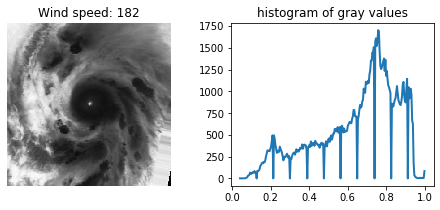

In [75]:
idx = 10
image = imread(join_path(train_images_dir, merged_train['image_id'].values[idx]+'.jpg'))
hist, hist_centers = histogram(image/255)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(image/255, cmap='Greys')
axes[0].axis('off')
axes[0].set_title(f"Wind speed: {merged_train['wind_speed'].values[idx]}");
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

Let's split into folds

In [89]:
merged_train.head()

,image_id,wind_speed,storm_id,relative_time,ocean
2784,bcf_038,185,bcf,82800,1
2785,bcf_039,185,bcf,86400,1
2782,bcf_036,184,bcf,79199,1
2783,bcf_037,184,bcf,81000,1
2786,bcf_040,184,bcf,88200,1


In [93]:
group_kfold = GroupKFold(n_splits=10)
X = merged_train['image_id'].values
y = merged_train['wind_speed'].values
groups = merged_train['storm_id'].values
for fold_idx, (train_index, val_index) in enumerate(group_kfold.split(X, y, groups)):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    group_train, group_val = groups[train_index], groups[val_index]
    train_df = pd.DataFrame({'image_id': X_train, 'wind_speed': y_train, 'storm_id': group_train})
    val_df = pd.DataFrame({'image_id': X_val, 'wind_speed': y_val, 'storm_id': group_val})
    train_df.to_csv(f'../data/fold{fold_idx}_train.csv', index=False)
    val_df.to_csv(f'../data/fold{fold_idx}_val.csv', index=False)